In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from numpy.linalg import inv

boston_dataset = load_boston()

In [36]:
feauters = boston_dataset.data
feauters.shape

(506, 13)

In [37]:
y = boston_dataset.target
y.shape

(506,)

In [38]:
w = inv(
    (feauters.T).dot(feauters)
).dot(
    feauters.T
).dot(y)

In [39]:
def custome_print(w, format_string = '{0:.2f}'):
    return [format_string.format(a) for i,a in enumerate(w)]

In [40]:
print(custome_print(w))

['-0.09', '0.05', '-0.00', '2.85', '-2.87', '5.93', '-0.01', '-0.97', '0.17', '-0.01', '-0.39', '0.01', '-0.42']


In [41]:
regression = LinearRegression().fit(feauters, y)

In [42]:
print(custome_print(regression.coef_))

['-0.11', '0.05', '0.02', '2.69', '-17.77', '3.81', '0.00', '-1.48', '0.31', '-0.01', '-0.95', '0.01', '-0.52']


In [52]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['target'] = pd.Series(boston_dataset.target)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [54]:
regression.predict(boston_dataset.data[0:10])

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211])

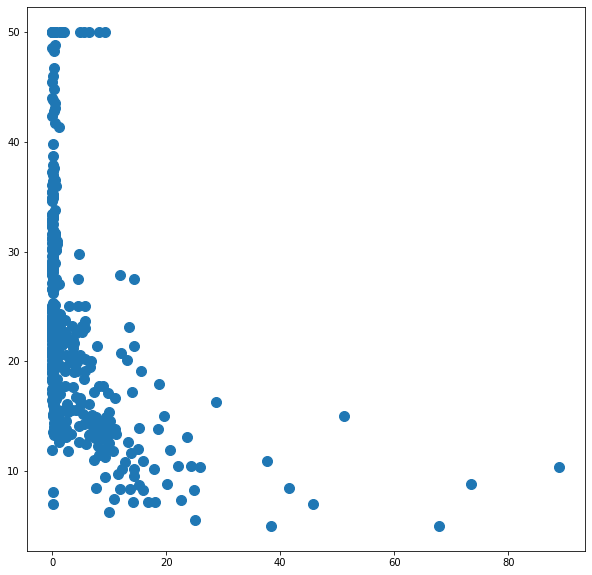

In [58]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

ax.scatter(df['CRIM'], df['target'], s=100)

plt.show()

In [61]:
print(mean_absolute_error(regression.predict(feauters), y))

3.2708628109003177


In [64]:
print(mean_squared_error(regression.predict(feauters), y))

21.894831181729202


In [66]:
print(r2_score(regression.predict(feauters), y))

0.6498212316698573
